In [65]:
%matplotlib inline

from IPython.display import Image,display

from numpy import pi

from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import LH_tools

from importlib import reload 
reload(LH_tools)


<module 'LH_tools' from '/home/oryonatan/qutip/LH_tools.py'>

In [35]:
n = 4
N = 2**n
id_n = tensor([qeye(2)]*n)
psi0 = tensor([basis(2,0)]*n)
psi0= hadamard_transform(n)*psi0
H_0 = id_n-psi0*psi0.trans()
rot_H0, rot_psi0 = LH_tools.rotate_by_had(H_0, psi0)
#display(H_0)
in_state = tensor([basis(2,0),basis(2,1),
                   basis(2,0),basis(2,1)])
H_1 = id_n - in_state*in_state.trans()


In [36]:

h_t1= [[H_0,'(1-t)'],
      [H_1, 't']]
tlist = np.linspace(0, 1000, 1000)
args = {'t_max': max(tlist)}
P_mat,evals_mat = simulate_adiabatic_process2(tlist, h_t1, args, in_state, False)

P_mat,EV_mat,time = LH_tools.benchmark(h_t1, in_state, steps=1000, T=1)

args = {'t_max':100}
h_t2= [[H_0,'(t_max-t)/t_max'],
      [H_1, 't/t_max']]
P_mat,EV_mat,time = LH_tools.benchmark(h_t2, in_state, steps=1000, T=1000)
# should be the same



/home/oryonatan/anaconda3/envs/qutip/lib/python3.5/site-packages/scipy/integrate/_ode.py:869: UserWarning: zvode: Excess work done on this call. (Perhaps wrong MF.)
  'Unexpected istate=%s' % istate))


Exception: ODE integration error: Try to increase the allowed number of substeps by increasing the nsteps parameter in the Options class.

In [ ]:
h1s = Qobj.evaluate()

In [7]:
h_t= [[H_0,'(t_max-t)/t_max'],
      [H_1, 't/t_max']]
rate = 1

s_one = find_s_one2(s_function2, rate , N , epsilon)
tlist = np.linspace(0, s_one, steps)
slist = s_function2(tlist , rate, N, epsilon) * s_one
args = {'t_max':s_one}
# P_mat,EV_mat = LH_tools.simulate_adiabatic_process2(slist, h_t, args ,in_state, False)
# LH_tools.plot_PandEV(P_mat, EV_mat,tlist)
slist

NameError: name 'find_s_one2' is not defined

This should be the same

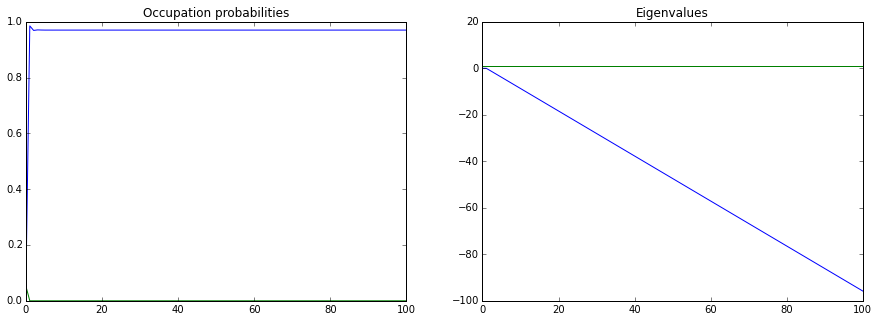

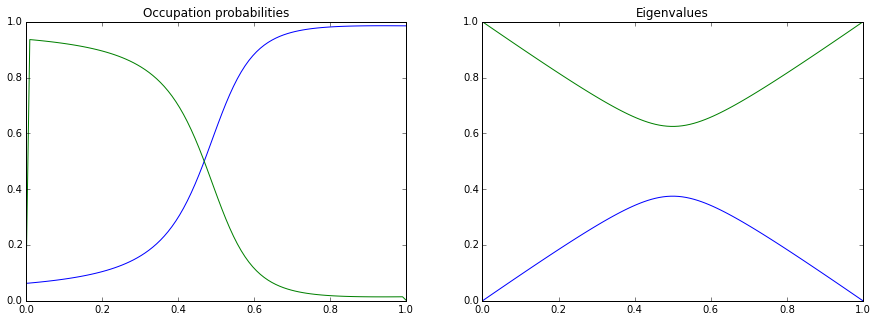

In [69]:
from  LH_tools import simulate_adiabatic_process3 , plot_PandEV
h_t2= [[H_0,'(t_max-t)/t_max'],
      [H_1, 't/t_max']]

tlist = np.linspace(0, 100, 100)
args = {'t_max': max(tlist)}
P_mat,evals_mat , output1= simulate_adiabatic_process3(tlist, h_t1, args, in_state, False)
plot_PandEV( P_mat, evals_mat ,tlist )

tlist = np.linspace(0, 1, 100)
args = {'t_max': max(tlist)}
P_mat,evals_mat ,output2= simulate_adiabatic_process3(tlist, h_t2, args, in_state, False)
plot_PandEV( P_mat, evals_mat ,tlist )
plt.show()

First compare hamiltonians

In [66]:
tlist = np.linspace(0, 100, 100)
args = {'t_max': max(tlist)}
ht_1 = [Qobj.evaluate(h_t2, t , args) for t in tlist]

tlist = np.linspace(0, 1, 100)
args = {'t_max': max(tlist)}
ht_2 = [Qobj.evaluate(h_t2, t , args) for t in tlist]

print ([(h1-h2).norm() for (h1,h2) in zip (ht_1, ht_2)])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [72]:
output1.times

array([   0.        ,    1.01010101,    2.02020202,    3.03030303,
          4.04040404,    5.05050505,    6.06060606,    7.07070707,
          8.08080808,    9.09090909,   10.1010101 ,   11.11111111,
         12.12121212,   13.13131313,   14.14141414,   15.15151515,
         16.16161616,   17.17171717,   18.18181818,   19.19191919,
         20.2020202 ,   21.21212121,   22.22222222,   23.23232323,
         24.24242424,   25.25252525,   26.26262626,   27.27272727,
         28.28282828,   29.29292929,   30.3030303 ,   31.31313131,
         32.32323232,   33.33333333,   34.34343434,   35.35353535,
         36.36363636,   37.37373737,   38.38383838,   39.39393939,
         40.4040404 ,   41.41414141,   42.42424242,   43.43434343,
         44.44444444,   45.45454545,   46.46464646,   47.47474747,
         48.48484848,   49.49494949,   50.50505051,   51.51515152,
         52.52525253,   53.53535354,   54.54545455,   55.55555556,
         56.56565657,   57.57575758,   58.58585859,   59.59595

In [74]:
output2.times

array([ 0.        ,  0.01010101,  0.02020202,  0.03030303,  0.04040404,
        0.05050505,  0.06060606,  0.07070707,  0.08080808,  0.09090909,
        0.1010101 ,  0.11111111,  0.12121212,  0.13131313,  0.14141414,
        0.15151515,  0.16161616,  0.17171717,  0.18181818,  0.19191919,
        0.2020202 ,  0.21212121,  0.22222222,  0.23232323,  0.24242424,
        0.25252525,  0.26262626,  0.27272727,  0.28282828,  0.29292929,
        0.3030303 ,  0.31313131,  0.32323232,  0.33333333,  0.34343434,
        0.35353535,  0.36363636,  0.37373737,  0.38383838,  0.39393939,
        0.4040404 ,  0.41414141,  0.42424242,  0.43434343,  0.44444444,
        0.45454545,  0.46464646,  0.47474747,  0.48484848,  0.49494949,
        0.50505051,  0.51515152,  0.52525253,  0.53535354,  0.54545455,
        0.55555556,  0.56565657,  0.57575758,  0.58585859,  0.5959596 ,
        0.60606061,  0.61616162,  0.62626263,  0.63636364,  0.64646465,
        0.65656566,  0.66666667,  0.67676768,  0.68686869,  0.69